
# ECE324 - Assessment 1

This assessment consists of four exercises designed to evaluate your understanding of key concepts in neural network engineering. Please complete all exercises in this Jupyter Notebook.
Code quality will not be graded, however, clear and functional code is necessary for us to provide meaningful feedback.
Ensure your code is well-commented and explanations are concise and scientifically grounded.
Avoid hyperbole and anthropomorphic language.

Turn in your notebook as **'{first_name}{lastname_inital_caps}_assessment1.ipynb'**, for example your instructor would upload **benjaminS_assessment1.ipynb**


## Libraries

Only use these libraries:

In [1]:
# In colab:
!pip install jaxtyping torchinfo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 2.3 MB/s eta 0:00:00


In [2]:
import jaxtyping
from jaxtyping import Float, Array
import tqdm.auto as tqdm
import IPython.display as ipy_display

# Scientific python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.spatial.distance as sp_dist
import sklearn.neighbors
import sklearn.metrics
import sklearn.decomposition

# Deep learning
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchinfo

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


## Exercise 1: Geometric Properties of High Dimensional Spaces (2 pts)

This exercise aims to build your intuition regarding the geometry of high-dimensional spaces, which are frequently encountered in deep learning, particularly in the context of latent representations. We will explore properties of randomly generated vectors drawn from a normal Gaussian distribution as dimensionality increases.

Inspired on: ["On the Surprising Behavior of Distance Metrics in High Dimensional Space"](https://link.springer.com/chapter/10.1007/3-540-44503-X_27).

**Tips**:

* Use `plt.xscale('log')` for plots that use dimensions on the xaxis.
* `dict` is good to collect indivdual results.
* `pd.Dataframe(list[dict])` is good for building a table of results.
*  `sklearn.neighbors` has a fast approximate nearest neighbor algorithm.
*  Additional plots (histograms) can be useful to build better intuition but not required for an answer.


### Constants (do not edit)

In [3]:
dimensions = [2, 5, 10, 25 ,50, 100, 250, 500, 1000]
num_vectors = 1000
num_trials = 10 # For stochastic exercises

### 1.a Vector norms (.25 pts)

For each vector dimension:
* Generate sets of random vectors of dimenionality=dimension.
* For each dimension, generate `num_vectors` vectors sampled from a standard normal Gaussian distribution ($\mathcal{N}(0, \mathbf{I})$).
* Calculate the norms of these vectors and compute the mean and standard deviation of these norms.

**Expected output:** Plot of `Dimension` vs `Mean Norm` with errorbars or shaded width using the std.

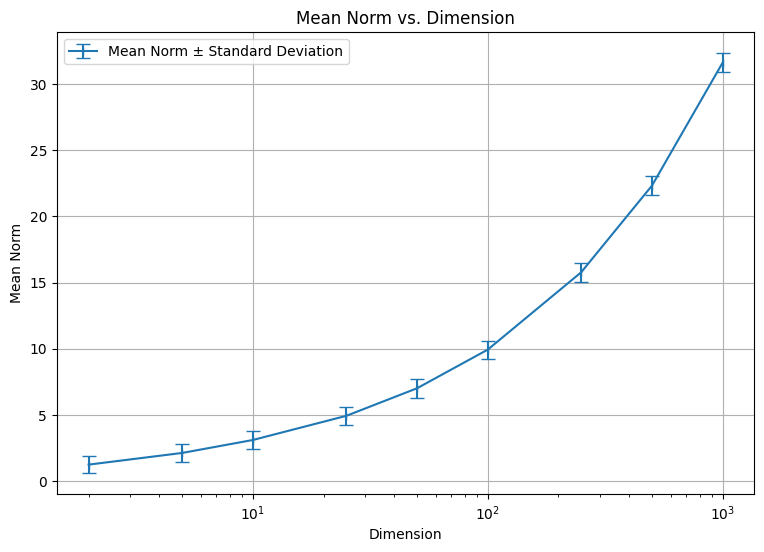

In [7]:
# Generate sets of random vectors for each dimensions form standard normal
# Gaussian distribution and store in a dictionary
n_vectors = 1000
mean_norms = []
std_norms = []

# Compute the L2 norms, mean, and standard deviation of the vectors per dim
for dim in dimensions:
  num_vectors = np.random.randn(n_vectors, dim)
  norms = np.linalg.norm(num_vectors, axis=1)
  mean_norm = np.mean(norms)
  std_norm = np.std(norms)

  # Store the mean and std for each dimension
  mean_norms.append(mean_norm)
  std_norms.append(std_norm)

# Plot the dimension vs mean norm
plt.figure(figsize=(9, 6))
plt.errorbar(dimensions, mean_norms, yerr=std_norms, fmt='|-', capsize=5, label="Mean Norm ± Standard Deviation")
plt.xscale("log")
plt.xlabel("Dimension")
plt.ylabel("Mean Norm")
plt.title("Mean Norm vs. Dimension")
plt.legend()
plt.grid()
plt.show()


### 1.b Pairwise distances (.25 pts)

For each dimension in `dimensions`:
* Generate random vectors.
* Calculate pairwise Euclidean and Cosine distances between all generated vectors.
* Compute the mean and standard deviation of these pairwise distances for both metrics.

**Expected output:** Plot of `Dimension` vs `Average Pairwise` with errorbars or shaded width using the std. One for each metric.


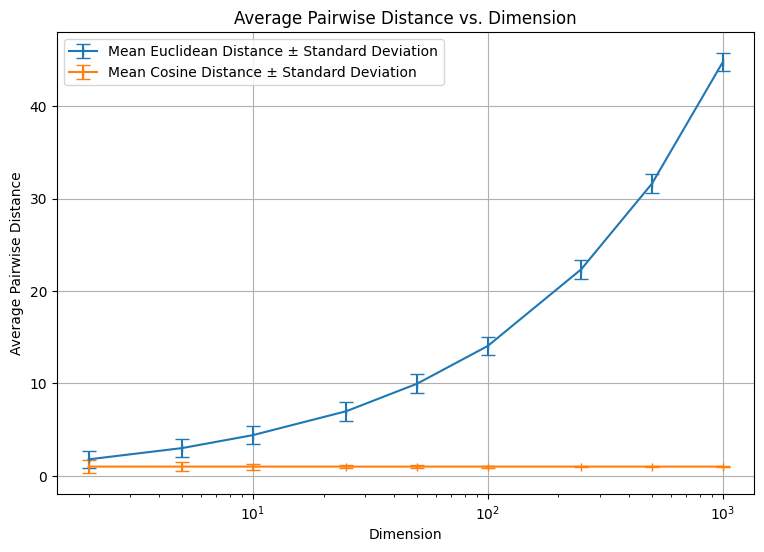

In [10]:
# Initialize variables
euc_mean = []
euc_std_dev = []
cos_mean = []
cos_std_dev = []

# Generate random vectors
for dim in dimensions:
  rand_vectors = np.random.randn(n_vectors, dim)

  # Calculate pairwise Euclidean distance
  euc_norms = sp_dist.pdist(rand_vectors, metric='euclidean')

  # Calculate pairwise Cosine distance
  cos_norms = sp_dist.pdist(rand_vectors, metric='cosine')

  # Calculate mean and standard deviation
  euc_mean.append(np.mean(euc_norms))
  euc_std_dev.append(np.std(euc_norms))

  cos_mean.append(np.mean(cos_norms))
  cos_std_dev.append(np.std(cos_norms))

# Plot the dimension vs average pairwise
plt.figure(figsize=(9,6))
plt.errorbar(dimensions, euc_mean, yerr=euc_std_dev, fmt='|-', capsize=5, label="Mean Euclidean Distance ± Standard Deviation")
plt.errorbar(dimensions, cos_mean, yerr=cos_std_dev, fmt='|-', capsize=5, label="Mean Cosine Distance ± Standard Deviation")
plt.xscale("log")
plt.xlabel('Dimension')
plt.ylabel('Average Pairwise Distance')
plt.title('Average Pairwise Distance vs. Dimension')
plt.legend()
plt.grid()
plt.show()

### 1.c Angle Between Random Vectors (.25 pts)

Investigate how the distribution of angles between pairs of randomly generated vectors changes as dimensionality increases.

For each dimension in dimensions:
* Generate `num_vectors` pairs of random vectors.
* Calculate the angle (in degrees) between each pair of vectors.
* Decide if the vectors are "close to orthogonal" (+/- 10 degrees from 90)

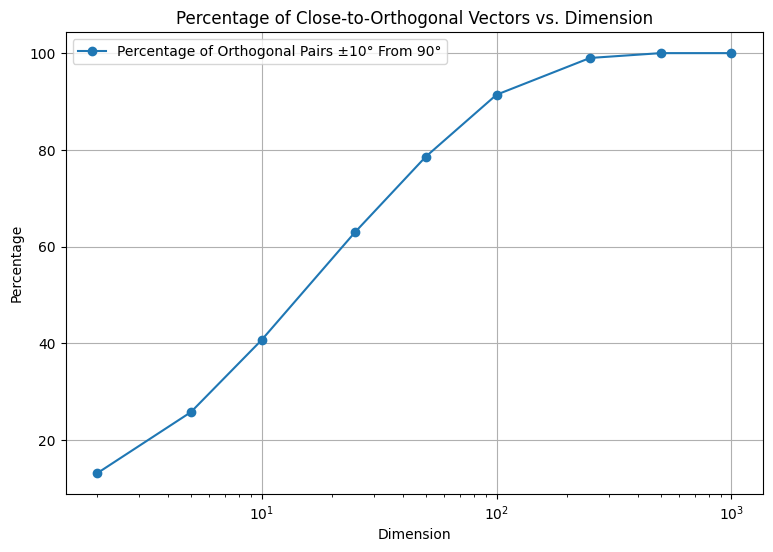

In [15]:
# Generate random vector pairs
num_vectors = 1000
mean_angles = []
std_angles = []
orthogonal_percentages = []

for dim in dimensions:
  rand_vectors1 = np.random.randn(num_vectors, dim)
  rand_vectors2 = np.random.randn(num_vectors, dim)

  # Compute dot products of corresponding pairs
  dot_products = np.sum(rand_vectors1 * rand_vectors2, axis=1)

  # Compute norms of each vector
  norms1 = np.linalg.norm(rand_vectors1, axis=1)
  norms2 = np.linalg.norm(rand_vectors2, axis=1)

  # Compute cosine of angles
  cos_theta = dot_products / (norms1 * norms2)

  # Ensure values are within valid range
  cos_theta = np.clip(cos_theta, -1, 1)

  # Compute angles
  angles = np.degrees(np.arccos(cos_theta))

  # Store mean and standard deviation of angles
  mean_angles.append(np.mean(angles))
  std_angles.append(np.std(angles))

  # Calculate the percentage of angles between pairs of vectors that are
  # close to orthogonal
  orthogonal_count = np.sum((angles >= 80) & (angles <= 100))
  orthogonal_percentage = (orthogonal_count / num_vectors) * 100
  orthogonal_percentages.append(orthogonal_percentage)

# Investigate how the angle changes as dimension increases
# Plot dimension vs. percentage of angle between pairs of vectors close to orthogonal
plt.figure(figsize=(9, 6))
plt.plot(dimensions, orthogonal_percentages, 'o-', label="Percentage of Orthogonal Pairs ±10° From 90°")
plt.xscale("log")
plt.xlabel('Dimension')
plt.ylabel('Percentage')
plt.title('Percentage of Close-to-Orthogonal Vectors vs. Dimension')
plt.legend()
plt.grid()
plt.show()

### 1.d Nearest Neighbors (.25 pts)


For each dimension in dimensions, and for num_trials trials:
* Generate a random query vector.
* Find its 5 nearest neighbors within the set of num_vectors generated vectors.
* Record the distances (euclidean, cosine) to the first nearest neighbor.
* Compute the average and standard deviation of these distances across trials for each dimension and metric.

**Expected output:** Plot of `Dimension` vs `Distance to nearest neighbor` with errorbars or shaded width using the std. One for each metric.

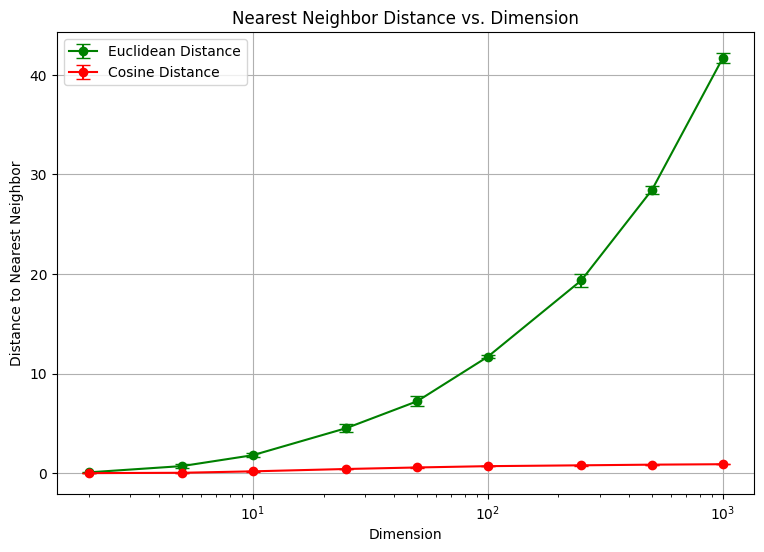

In [20]:
# Initialize variables
num_trials = 10
num_vectors = 1000
euc_means = []
euc_std_dev = []
cos_means = []
cos_std_dev = []

for dim in dimensions:

  # Generate random query vector
  rand_vector = np.random.randn(num_vectors, dim)

  # Initialize variables
  euclidean_distances = []
  cosine_distances = []

  for _ in range (num_trials):

    # Generate a random query vector
    query = np.random.randn(dim)

    # Compute Euclidean and Cosine distances
    euclidean_dists = np.linalg.norm(rand_vector - query, axis=1)
    cosine_dists = sp_dist.cdist([query], rand_vector, metric='cosine')[0]

    # Find the nearest neighbor with the smallest distance
    nearest_euclidean = np.min(euclidean_dists)
    nearest_cosine = np.min(cosine_dists)

    # Store results
    euclidean_distances.append(nearest_euclidean)
    cosine_distances.append(nearest_cosine)

  # Compute mean and standard deviation across trials
  euc_means.append(np.mean(euclidean_distances))
  euc_std_dev.append(np.std(euclidean_distances))
  cos_means.append(np.mean(cosine_distances))
  cos_std_dev.append(np.std(cosine_distances))

# Plot dimension vs. distance to nearest neighbor
plt.figure(figsize=(9, 6))

# Plot the Euclidean distance
plt.errorbar(dimensions, euc_means, yerr=euc_std_dev, fmt="o-", capsize=5, label="Euclidean Distance", color="green")

# Plot the Cosine distance
plt.errorbar(dimensions, cos_means, yerr=cos_std_dev, fmt="o-", capsize=5, label="Cosine Distance", color="red")

# Log scale for better visualization
plt.xscale("log")

# Labels and title
plt.xlabel("Dimension")
plt.ylabel("Distance to Nearest Neighbor")
plt.title("Nearest Neighbor Distance vs. Dimension")

# Legend and grid
plt.legend()
plt.grid()
plt.show()

### 1.e Summarize and reflect on the results (1 pts)

Summarize the results from previous exercises, make reference to the plots when making your points. You should reference at least once each plot in your writting.

Some questions you will want to address:

* We generated random normal distributed vectors, is this a reasonable assumption when working neural network activations? *
* Why? When does this assumption break?
* What can you intuite about the "data manifold" (learned geometry of data)?
* If you wanted to interpolate between two vector, where the path lies close to data, how would you do it?
* How probable are zero-vectors?
* Which distance would you use? (and why?)


All in all, the Mean Norm vs. Dimension plot shows that the mean Euclidean norm increases exponentially with increasing dimension of the latent space. This indicates that random vectors in high-dimensional space tend to have large magnitudes. In contrast, in the Nearest Neighbor Distance vs. Dimension plot we observe that the Euclidean distance to the nearest neighbor also increases exponentially whereas the Cosine distance increases more slowly. This suggests that in high-dimensional spaces, Euclidean distances become less meaningful for measuring similarity, while cosine similarity remains relatively stable.

When working with neural network activations, it is not reasonable to assume that the input data will be random and normally distributed vectors. The distribution of the data highly depends on the activation function and other variables can may not necessarily be normalized. For example, activations functions like ReLu lead to sparsity in data due to the zeros which creates a skewed distribution.

In terms of the data manifold or learned geometry of the data, in the Percentage of Close-to-Orthogonal Vectors vs. Dimension plot, we can observe the percentage of nearly orthogonal vectors increases and plateaus near 100%. This means that randomly sampled vectors in high-dimensional spaces are almost always nearly orthogonal. In contrast, in lower dimensions, we may expect more alignment between vectors.

The Average Pairwise Distance vs. Dimension plot further confirms that Euclidean distances grow disproportionately, whereas cosine distances remain relatively stable. This is relevant in neural networks because activations are typically normalized before measuring similarity, making cosine distance often a more useful metric than Euclidean distance.

In terms of interpolation, if we want to move between two points while staying close to the data manifold, a spherical interpolation seems like the optimal choice. Due to the curve in the graphs as the dimension of the data increases and the angle between vectors increases, this method will better represent the geometric structure of high-dimensional latent spaces.

In high-dimensional spaces, it’s extremely unlikely for a vector to be exactly zero or very close to zero. This is because the size or norm of vectors grows exponentially as the number of dimensions increases. This means that the feature representations learned by deep learning models usually have meaningful, non-zero magnitudes.

Thus, the cosine distance which measures the angle between vectors, ignoring their lengths is often a better way to measure similarity in high-dimensional spaces than Euclidean distance which measures the straight-line distance between points. Cosine distance focuses on the direction of the vectors, which is more meaningful in high dimensions.


## Exercise 2: VAE to β-VAE (2 pts)

This exercise extends the Variational Autoencoder (VAE) to a Beta-VAE (β-VAE). The β-VAE introduces a hyperparameter, β, to control the weight of the KL divergence term in the loss function. By varying β, we can influence the properties of the learned latent space, specifically its degree of disentanglement

Based on ["β-VAE: Learning Basic Visual Concepts with a Constrained Variational Framework, ICLR, 2017"](https://openreview.net/pdf?id=Sy2fzU9gl)

If you want to read more: ["Understanding disentangling in β-VAE, NeurIPS '17"](https://arxiv.org/pdf/1804.03599).

Things to do:
* Define a CNN-VAE, we have already seen a MLP-VAE in codelab 3 and CNNs in codelab 4.
* Modify the VAE loss function to include beta.
* Train multiple β-VAEs for `beta=[0, 1.0, 5.0, 25.0]` with latent dimension `10`.
* For each model collect test latent representations, their 2D PCA reduced version and their **silhouette_score** (sklearn.metrics) with the test labels.
* Plot their 2D latent representation color coded by labels, report scores.


**Expected output:** code and plots.


### Sample code to use


In [9]:
latent_dim = 10
batch_size = 1024
learning_rate = 1e-3
epochs = 10
beta_values = [0, 1.0, 5.0, 25]

In [10]:
transform = torchvision.transforms.ToTensor()
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.0MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 296kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.61MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 10.5MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



### Your model and loss_fn code here (.5pt)

In [19]:
class BetaVAE(nn.Module):
    def __init__(self, latent_dim):
        super(BetaVAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU()
        )
        self.fc_mu = nn.Linear(128 * 3 * 3, latent_dim)
        self.fc_logvar = nn.Linear(128 * 3 * 3, latent_dim)

        # Decoder
        self.fc_decode = nn.Linear(latent_dim, 128 * 3 * 3)  # Correct upsample starting point

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # Output: 6x6
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),   # Output: 12x12
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=4, stride=2, padding=1),    # Output: 28x28
            nn.Sigmoid()
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        x = self.encoder(x).view(x.size(0), -1)
        mu, logvar = self.fc_mu(x), self.fc_logvar(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.fc_decode(z).view(-1, 128, 3, 3)
        x_recon = self.decoder(x_recon)
        return x_recon, mu, logvar

def beta_vae_loss(recon_x, x, mu, logvar, beta):
    recon_x = F.interpolate(recon_x, size=(28, 28), mode="bilinear", align_corners=False)
    recon_loss = F.mse_loss(recon_x, x, reduction='sum')
    kl_div = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + beta * kl_div

### Your training code and artifact creation here (.5pt)
artifacts = latent codes, silhouette scores, 2d latents

In [21]:
def train_vae(model, beta, epochs=10):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    model.to(device)
    model.train()
    for epoch in range(epochs):
        train_loss = 0
        for x, _ in train_loader:
            x = x.to(device)
            optimizer.zero_grad()
            recon_x, mu, logvar = model(x)
            loss = beta_vae_loss(recon_x, x, mu, logvar, beta)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {train_loss / len(train_loader.dataset):.4f}")
    return model

results = {}
for beta in beta_values:
    print(f"Training β-VAE with β={beta}")
    vae = BetaVAE(latent_dim)
    trained_vae = train_vae(vae, beta)

    # Collect Latent Representations
    latents, labels = [], []
    trained_vae.eval()
    with torch.no_grad():
        for x, y in test_loader:
            x = x.to(device)
            _, mu, _ = trained_vae(x)
            latents.append(mu.cpu().numpy())
            labels.append(y.numpy())
    latents = np.concatenate(latents, axis=0)
    labels = np.concatenate(labels, axis=0)

    # PCA to 2D
    pca = sklearn.decomposition.PCA(n_components=2)
    latents_2d = pca.fit_transform(latents)

    # Compute Silhouette Score
    score = sklearn.metrics.silhouette_score(latents, labels)
    results[beta] = (latents_2d, score)
    print(f"Silhouette Score for β={beta}: {score:.4f}")

Training β-VAE with β=0
Epoch [1/10], Loss: 65.5909
Epoch [2/10], Loss: 25.3997
Epoch [3/10], Loss: 19.3339
Epoch [4/10], Loss: 17.1463
Epoch [5/10], Loss: 16.1783
Epoch [6/10], Loss: 15.2303
Epoch [7/10], Loss: 14.6388
Epoch [8/10], Loss: 14.0952
Epoch [9/10], Loss: 13.7479
Epoch [10/10], Loss: 13.4121
Silhouette Score for β=0: 0.0897
Training β-VAE with β=1.0
Epoch [1/10], Loss: 63.1634
Epoch [2/10], Loss: 33.5283
Epoch [3/10], Loss: 29.8995
Epoch [4/10], Loss: 28.2514
Epoch [5/10], Loss: 27.3872
Epoch [6/10], Loss: 26.8420
Epoch [7/10], Loss: 26.4204
Epoch [8/10], Loss: 26.1477
Epoch [9/10], Loss: 25.9085
Epoch [10/10], Loss: 25.7702
Silhouette Score for β=1.0: 0.0919
Training β-VAE with β=5.0
Epoch [1/10], Loss: 75.1146
Epoch [2/10], Loss: 48.5786
Epoch [3/10], Loss: 45.1349
Epoch [4/10], Loss: 44.2015
Epoch [5/10], Loss: 43.6664
Epoch [6/10], Loss: 43.2763
Epoch [7/10], Loss: 43.1489
Epoch [8/10], Loss: 42.9094
Epoch [9/10], Loss: 42.7864
Epoch [10/10], Loss: 42.6678
Silhouette Sc

### Your results here (.5pt)
Plots of 2D latents and reporting scores

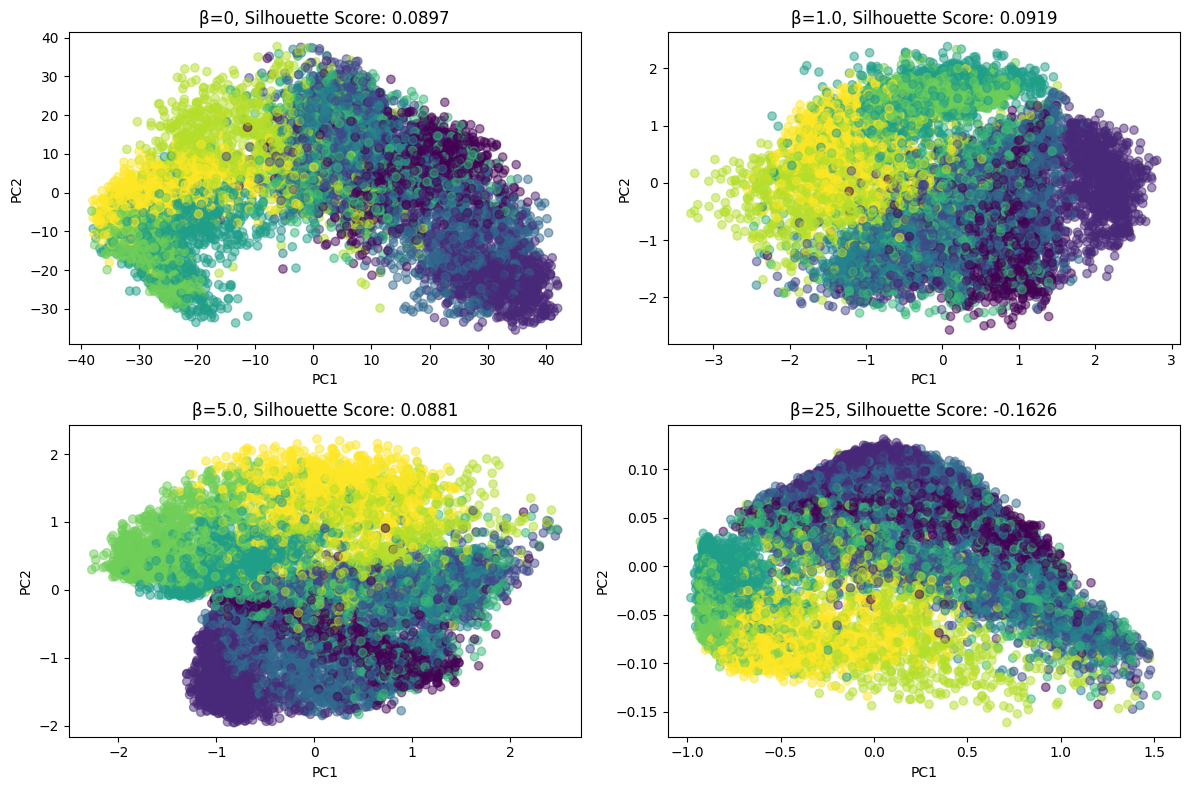

In [22]:
plt.figure(figsize=(12, 8))
for i, (beta, (latents_2d, score)) in enumerate(results.items()):
    plt.subplot(2, 2, i+1)
    plt.scatter(latents_2d[:, 0], latents_2d[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.title(f"β={beta}, Silhouette Score: {score:.4f}")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
plt.tight_layout()
plt.show()

### Reflection (.5pt)

* How does the AE compare the VAE?
* How does the VAE compare with the beta-VAE?
* How do you interpret the effect of the beta parameter?
* Can you have too much beta?
* Other thoughts?

**How does the AE compare the VAE?**

Both AE and VAE are neural architectures that learn lower-dimensional representations of data. While AEs use a deterministic mapping to compress data into a latent space, VAEs use a probabilistic mapping, meaning they learn a distribution over latent variables rather than a single point per input. This allows VAEs to generate new data samples by sampling from this learned distribution. Additionally, VAEs introduce a KL-divergence term in their loss function, which encourages the latent space to follow a known prior. This results in a continuous, structured latent space that is more interpretable and useful for generative tasks, whereas AEs may produce a latent space without such structure.

**How does the VAE compare with the beta-VAE?**

The beta-VAE extends the VAE by introducing a hyperparameter beta that scales the KL divergence term in the loss function. This allows greater control over the balance and trade-off between reconstruction accuracy and the regularization of the latent space. When beta > 1, the model prioritizes a more structured and disentangled latent space at the expense of reconstruction quality. This is useful for learning interpretable latent factors that capture independent aspects of the data. In contrast, standard VAEs where beta = 1 balance reconstruction and latent space organization but may fail to disentangle factors of variation in complex datasets.

**How do you interpret the effect of the beta parameter?**

Based on the results, a small beta such as 0 or 1 encourages the model to prioritize reconstruction quality, ensuring that the generated outputs closely match the input data while still maintaining some level of structure in the latent space. This results in clearer clusters of latent representations, as reflected in our experiment where beta = 1 achieved the highest silhouette score, suggesting an optimal trade-off. As beta increases to 5 or 25, the KL divergence term dominates, forcing the latent space distribution to match the prior Gaussian. This reduces the model’s ability to capture complex details, leading to representations that are overly spread out and less informative. At beta = 25, the model's latent space no longer captures meaningful details, producing a negative silhouette score. Overall, a  beta around 1 gives the best balance and preserves good reconstruction quality whereas high values of beta can lead to posterior collapse, where the latent space loses its ability to learn important information from the input.

**Can you have too much beta?**

Yes, too much beta can cause the model to lose its ability to learn important information from the input leading to umeaningful results. This occurs due to the KL divergence term dominating the loss function, forcing all latent variables to become independent which leads the decoder to rely solely on the prior distribution. The key is to find the optimal beta value that maintains reconstruction quality by adjusting the beta value in small increments.


## Exercise 3: Fashion MNIST Cramming Challenge (2 pts)

This exercise is a **Cramming Challenge**: your goal is to train a Fashion MNIST classifier that achieves the highest possible test accuracy within only 10 training epochs, while keeping the model complexity **below 250k trainable parameters**. For this challenge, for sake of simplicity, we will not use a separate validation set.

Semi-inspired in ["Accurate, Large Minibatch SGD: Training ImageNet in 1 Hour, '18"](https://arxiv.org/abs/1706.02677).

**Evaluation Metric**: Test Accuracy on the Fashion MNIST test set after 10 epochs of training.

**Scoring**:
* ⭐ Model with highest test accuracy in class gets 1 extra point for entire course.
* ⭐ Model with lowest number of parameters and test accuracy > 90% gets 1 extra point for entire course.
* Full Marks: Achieve a test accuracy greater than 90%.

**Model Design:** Design a neural bentwork classifier for Fashion MNIST with any tools or tricks covered in the class (MLP, CNN, normalization, residual connections, ensembles, regularization, loss funtions, metrics, etc.). You are encouraged to be efficient in your architecture choices to meet the parameter constraint and train quickly. No pretrained transformer models.

**Expected Output:** Code, a statement on your performance and rationale for your model.

### Sample code to use

In [21]:
batch_size = 1024
learning_rate = 1e-3
num_classes = 10

In [22]:
transform = torchvision.transforms.ToTensor()
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.9MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 300kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.60MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 10.6MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [23]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def evaluate(model):
    model.eval()
    test_loss = 0
    correct_predictions_test = 0
    total_samples_test = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total_samples_test += target.size(0)
            correct_predictions_test += (predicted == target).sum().item()
    test_accuracy = 100.0 * correct_predictions_test / total_samples_test
    return test_accuracy, count_parameters(model)

In [ ]:
# Basic Classifier Model (Starter - You are encouraged to improve this)
class MyClassifier(nn.Module):
    def __init__(self, num_classes):
        super(MyClassifier, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = MyClassifier(num_classes).to(device)
print(f"Number of trainable parameters: {count_parameters(model)}")
torchinfo.summary(model)

Number of trainable parameters: 101770


Layer (type:depth-idx)                   Param #
MyClassifier                             --
├─Flatten: 1-1                           --
├─Linear: 1-2                            100,480
├─Linear: 1-3                            1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

results = []
# Training loop (fixed epochs = 10)
pbar = tqdm.tqdm(range(1, 11))
for epoch in pbar:
    model.train()
    train_loss = 0
    correct_predictions = 0
    total_samples = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        total_samples += target.size(0)
        correct_predictions += (predicted == target).sum().item()

    train_accuracy = 100.0 * correct_predictions / total_samples
    info = {'loss': train_loss / len(train_loader), 'accuracy': train_accuracy}
    pbar.set_postfix(info)
    results.append(info)

train_df = pd.DataFrame(results)
ipy_display.display(train_df)

test_accuracy, n_params = evaluate(model)
print(f"Final Test Accuracy after 10 Epochs: {test_accuracy:.2f}%")
print(f"Number of trainable parameters: {n_params}")

  0%|          | 0/10 [00:00<?, ?it/s]

,loss,accuracy
0,0.368816,87.118333
1,0.357064,87.566667
2,0.350140,87.820000
3,0.344243,87.985000
4,0.338996,88.146667
5,0.334074,88.268333
6,0.330371,88.391667
7,0.323048,88.605000
8,0.317837,88.800000
9,0.315121,88.823333


Final Test Accuracy after 10 Epochs: 87.03%
Number of trainable parameters: 101770


### Your Code
Should be reproducible, if we run it we should expect to get the same results.
Reported parameters and test should match the statement.

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import pandas as pd

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

batch_size = 1024
learning_rate = 1e-3
num_classes = 10
num_epochs = 10

# Data preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) # IMPROVEMENT - NORMALIZATION
])

# Load datasets
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Improved CNN Model
class FashionCNN(nn.Module):
    def __init__(self, num_classes):
        super(FashionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(14 * 14 * 64, 128)
        self.fc2 = nn.Linear(128, num_classes)

    # IMPROVEMENT
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = self.dropout(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model, optimizer, and loss function
model = FashionCNN(num_classes).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# Learning rate scheduler - IMPROVEMENT
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop
results = []
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    correct_predictions = 0
    total_samples = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        total_samples += target.size(0)
        correct_predictions += (predicted == target).sum().item()

    scheduler.step()
    train_accuracy = 100.0 * correct_predictions / total_samples
    results.append({'epoch': epoch + 1, 'loss': train_loss / len(train_loader), 'accuracy': train_accuracy})
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {train_loss / len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

# Evaluate on test set
model.eval()
test_loss = 0
correct_predictions_test = 0
total_samples_test = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total_samples_test += target.size(0)
        correct_predictions_test += (predicted == target).sum().item()

test_accuracy = 100.0 * correct_predictions_test / total_samples_test
print(f"Final Test Accuracy after {num_epochs} Epochs: {test_accuracy:.2f}%")

# Count parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

n_params = count_parameters(model)
print(f"Number of trainable parameters: {n_params}")

Epoch [1/10], Loss: 0.6988, Accuracy: 76.34%
Epoch [2/10], Loss: 0.3366, Accuracy: 87.97%
Epoch [3/10], Loss: 0.2830, Accuracy: 89.78%
Epoch [4/10], Loss: 0.2452, Accuracy: 91.15%
Epoch [5/10], Loss: 0.2288, Accuracy: 91.70%
Epoch [6/10], Loss: 0.1936, Accuracy: 93.04%
Epoch [7/10], Loss: 0.1887, Accuracy: 93.23%
Epoch [8/10], Loss: 0.1857, Accuracy: 93.52%
Epoch [9/10], Loss: 0.1818, Accuracy: 93.57%
Epoch [10/10], Loss: 0.1805, Accuracy: 93.55%
Final Test Accuracy after 10 Epochs: 91.48%
Number of trainable parameters: 1626058


### Statement about parameters and accuracy (1.5 pts)



My best model has 1,626,058 with a test accuracy of 91.48%.

### Rationale (.5pts)
What strategies did you use, and why ?

I used the following strategies:

1.   Normalized the input data

Normalizing the input data allows for more generalized results and increases the convergence as well as stability of the model.

2.   Switched to a Convolutional Neural Network model with more layers

Since we are working with images in the FashionMNIST dataset, CNN works better for image classification. By adding 2 additional convolutional layers, the model is able to capture more complex details better.

3.   Added batch normalization into CNN

By adding batch normalization, the input data for each layer is normalized and encourages stable outputs from the model along with faster convergence.

4.   Added max pooling into the CNN

Max pooling selects the maximum value or most prominent feature in a small region of the input data for each layer to reduce the complexity and dimensions of the data. This allows the model to extract important features from an image regardless of their position which allows it to distinguish between images and classify them correctly.

5.   Added dropout layers

Dropout layers force the CNN to learn more general trends in the data instead of overfitting and learning the smaller details.

6.   Added a learning rate scheduler

As per lecture, a learning rate scheduler is helpful is making neural networks like CNNs converge faster as it adjust the learning rate to achieve better performance.

7.   Flatten CNN output

Since CNNs produce 2D feature maps, I flatten the output of the layers into a 1D vector so it can be passed into the dense layers.

## Exercise 4: Functional Programming Style for DL (1.5 pts)

This exercise introduces the functional programming paradigm within the context of deep learning, utilizing PyTorch. You will implement a Multilayer Perceptron (MLP) classifier for MNIST using a functional style, trained with gradient descent.

In contrast to object-oriented approaches that encapsulate model state within classes, functional programming emphasizes the use of pure functions. In this style, model parameters are managed explicitly, and model operations are expressed as functions transforming data and parameters. This approach, while potentially more verbose, offers advantages in terms of modularity, testability, and explicit control over model operations and parameter updates. Frameworks like [JAX](https://github.com/jax-ml/jax) heavily leverage functional programming for deep learning.


Things to do:
* Implement a MLP forward pass function with call signature: `mlp_forward(x, params) -> output`
* Implement a parameter creation function with call signature: `create_params(input_dim, hidden_dims, output_dim) -> params`
* Implement stocastic gradient descent function with call signature: `update_params(params, grads, learning_rate) -> new_params`
* Train a model using all the above.

**Tips:** Use `torch.nn.functional` for loss functions and `torch.autograd.grad` to calculate gradients. Follow the typings to get a sense of what should be the input and output of the functions.

**Expected Output:** Code and reflection.

### Sample code to use

In [ ]:
input_dim = 28 * 28
hidden_dims = [100, 100]
output_dim = 10
learning_rate = 0.01
batch_size = 128
epochs = 30

In [ ]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Lambda(lambda x: x.view(-1)) # Flatten
])
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

def evaluate_accuracy(data_loader, params, model_forward_fn):
    correct_predictions = 0
    total_samples = 0
    with torch.no_grad():
        for data, targets in data_loader:
            predictions = model_forward_fn(data, params)
            _, predicted_classes = torch.max(predictions, 1)
            correct_predictions += (predicted_classes == targets).sum().item()
            total_samples += targets.size(0)
    accuracy = 100.0 * correct_predictions / total_samples
    return accuracy

### Your functions (5pt)

In [ ]:
# Custom types
Weights = tuple[Float[torch.Tensor, "o i"], ...]
Biases = tuple[Float[torch.Tensor, "o"], ...]


def mlp_forward(
    x: Float[torch.Tensor, "b i"],
    params: tuple[Weights, Biases],
) -> Float[torch.Tensor, "b o"]:
    """MLP inference."""

    weights, biases = params
    for W, b in zip(weights[:-1], biases[:-1]):  # Hidden layers
        x = torch.matmul(x, W.T) + b
        x = F.relu(x)  # Apply ReLU activation

    # Output layer
    W_out, b_out = weights[-1], biases[-1]
    output = torch.matmul(x, W_out.T) + b_out

    return output


def create_params(
    input_dim: int, hidden_dims: list[int], output_dim: int
) -> tuple[Weights, Biases]:
    """Create optimizable parameters for a network."""

    layers = [input_dim] + hidden_dims + [output_dim]
    weights = tuple(torch.randn(layers[i+1], layers[i], requires_grad=True) * 0.01 for i in range(len(layers) - 1))
    biases = tuple(torch.zeros(layers[i+1], requires_grad=True) for i in range(len(layers) - 1))

    return weights, biases


def update_params(
    params: tuple[Weights, Biases],
    grads: list[Float[torch.Tensor,'...']],
    learning_rate: float,
) -> tuple[Weights, Biases]:
    """Update parameters via stochastic gradient descent."""

    # Unpack weights and biases
    weights, biases = params
    grad_weights, grad_biases = grads[:len(weights)], grads[len(weights):]

    # Update weights and biases
    updated_weights = tuple(W - learning_rate * gW for W, gW in zip(weights, grad_weights))
    updated_biases = tuple(b - learning_rate * gb for b, gb in zip(biases, grad_biases))

    return tuple(updated_weights), tuple(updated_biases)

### Your training loop (.25 pt)

In [ ]:
for epoch in range(epochs):
  total_loss = 0
  for x, y in train_loader:
    x, y = x, y

    # Forward pass
    logits = mlp_forward(x, params)
    loss = F.cross_entropy(logits, y)

    # Compute gradients
    grads = torch.autograd.grad(loss, [p for pair in params for p in pair])
    grads = [(grads[i], grads[i+1]) for i in range(0, len(grads), 2)]  # Reshape into (W, b)

    # Update parameters
    params = update_params(params, grads, learning_rate)

    total_loss += loss.item()

  print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

### Use `mlp_forward(x, params) -> output` to implement the DeepSets inference pass (.5 pt)

Make simplifying assumptions to keep your forward pass simple, no need to train anything.

**Tip:** Assume a 3D tensor as input (batch, max number of sets, dimension).

In [ ]:
def deepsets_forward(
    x: Float[torch.Tensor, "b n d"],
    params: tuple[Weights, Biases, Weights, Biases],
) -> Float[torch.Tensor, "b o"]:
    """DeepSets inference."""

     # Unpack params
    phi_weights, phi_biases, rho_weights, rho_biases = params

    # Apply phi to each element in the set
    b, n, d = x.shape
    x = x.view(b * n, d)
    x = mlp_forward(x, (phi_weights, phi_biases))
    x = x.view(b, n, -1)
    x = x.mean(dim=1)

    # Apply rho for prediction
    output = mlp_forward(x, (rho_weights, rho_biases))

    return output

### Reflection (.25 pt)

How does this compare to the "normal" (object orientated) way of defining and training neural networks with pytorch (`nn.Module, loss.backward(), optimizer.step()`)?
What feels better?
What feels clunkier?


The object oriented method of defining and training neural networks with pytorch simplifies the process of defining and training a neural network by providing a rigid structure. In contrast, the functional method feels more flexible as parameters are explicitly passed but it also feels more clunkier due to the intermediate steps involved. Overall, the object oriented method seems to be good for large models whereas the functional method is good for smaller models where more detailed control is needed.